# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
north_df = pd.read_csv("./NorthCallCenter.csv")
south_df = pd.read_csv("./SouthCallCenter.csv")

# north_df.head() --successfully installed
# south_df.head() --successfully installed

In [2]:
print(pd.__version__)

2.2.3


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
# EDA Question 1A solution below:
n_reps = north_df.groupby('Rep ID')
# groups the reps by their ID
# need to count the sum of each group, and would also like a list of the names to print, for future reference when I combine the 2 dataframes from the call centers. 
print(n_reps.sum())



        Unnamed: 0                                             Branch  \
Rep ID                                                                  
Amanda        2666  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Andy          2494  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Brent         4840  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Cam           2746  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Duke          2999  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Joe           3178  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Lilly         3375  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Todd          4252  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Xander        3340  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   

                                             Call Purpose  \
Rep ID                                                      
Amanda  Product SupportProduct SupportProduct SupportS...   
Andy    Compl

In [4]:
no_reps = north_df['Rep ID'].nunique()
# groups the reps by their ID, and then counts the unique values
print(no_reps)


9


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
# EDA Question 1B solution Below:
s_reps = south_df.groupby('Rep ID')
# groups the reps by their ID
# need to count the sum of each group, and would also like a list of the names to print, for future reference when I combine the 2 dataframes from the call centers. 
print(s_reps.sum())
#this returned the group of names, but I had to manually count the reps. Not ideal. 

        Unnamed: 0                                             Branch  \
Rep ID                                                                  
Alice         3637  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Eric          5039  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
George        4620  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Helga         5236  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Josh          3960  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Karl          4532  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Kate          4615  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Randy         4576  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Sandy         4694  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Sharon        4226  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   
Susan         4006  SouthSouthSouthSouthSouthSouthSouthSouthSouthS...   

                                             Call 

In [6]:
so_reps = south_df['Rep ID'].nunique()
# counts the unique values
print(so_reps)


11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
# EDA Question 2A solution Below:
north_avg_busy = north_df['Busy Minutes'].mean()
north_avg_busy2= round(north_avg_busy,2)

print(north_avg_busy2)

9.99


In [8]:
north_avg_not = north_df['Not Ready Minutes'].mean()
north_avg_not2= round(north_avg_not,2)

print(north_avg_not2)

1.91


In [9]:
north_avg_inc = north_df['Incoming Wait Time'].mean()
north_avg_inc2= round(north_avg_inc,2)

print(north_avg_inc2)

3.05


In [10]:
north_avg_during = north_df['During Call Wait Time'].mean()
north_avg_during2= round(north_avg_during,2)

print(north_avg_during2)

2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [11]:
# EDA Question 2B solution Below:
south_avg_busy = south_df['Busy Minutes'].mean()
south_avg_busy2= round(south_avg_busy,2)

print(south_avg_busy2)

10.05


In [12]:
south_avg_not = south_df['Not Ready Minutes'].mean()
south_avg_not2= round(south_avg_not,2)

print(south_avg_not2)

1.91


In [13]:
south_avg_inc = south_df['Incoming Wait Time'].mean()
south_avg_inc2= round(south_avg_inc,2)

print(south_avg_inc2)

3.0


In [14]:
south_avg_during = south_df['During Call Wait Time'].mean()
south_avg_during2= round(south_avg_during,2)

print(south_avg_during2)

3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [15]:
# I need to know the shape of my data for this to make sure I'm getting all the rows and not missing any data:
north_df.shape

(245, 15)

In [16]:
# I need to know the shape of my data for this to make sure I'm getting all the rows and not missing any data:
south_df.shape


(314, 15)

In [17]:
# EDA Question 3 solution Below:
# I want to create a new dataframe with just the information from these columns in it so I can then group by and sum. 
# I only need the time block column and the calls column from each dataset in the new dataframe, so I'm going to build that out. 
# I should have 2 columns (or 3 with the index) and 659 rows of data if I do this correctly. (based on the the blocks I ran above)

subset_no = north_df[['Branch','Time Block','Calls']]
subset_so = south_df[['Branch','Time Block','Calls']]

all_tb_calls = pd.concat([subset_no, subset_so], axis=0)

tb = all_tb_calls.groupby('Time Block')
print(tb.sum())





                                                       Branch  Calls
Time Block                                                          
10:00 AM    NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     99
11:00 AM    NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     56
12:00 PM    NorthNorthNorthNorthNorthNorthNorthNorthNorthN...    120
1:00 PM     NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     40
2:00 PM     NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     65
3:00 PM     NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     73
4:00 PM     NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     53
5:00 PM     NorthNorthNorthNorthNorthNorthNorthNorthNorthN...     43
9:00 AM     NorthNorthNorthNorthNorthSouthSouthSouthSouthS...     10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [18]:
# I started with some general information gathering and found some overrall items to clean up before I get any farther. 
# I applied the same functions to each dataframe and use a new code block for every single function for each call center in order to have a visual of all the cleaning and 
# the output as I'm assessing what do to with these to make the manipulation and visuaization sections easier. 


In [19]:
north_df.describe()
# the output doesn't indicate any outliers to handle or be concerned about. 

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [20]:
south_df.describe()
# similar to above--including similar stats overall between the 2 call centers. 
# there doesn't seem to be anything to be concerned about statistically with either dataset. 
# Comparing them and merging them shouldn't cause issues with the columns that have numerical data. 

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [21]:
print (north_df.dtypes)
# based on this information and what I can see when I look at the CSV files, I'm going to change all of the columns that are currently "objects" to "strings" and remove spaced from the middle of the strings,
# like the option in call purpose and time block. 
# I think performing that during cleaning will help with some of the other features that I will need to use later, like groupby. 
# none of the columns that are currently idetified as "object" need to be treated as an integer or float, so I want to make them very clearly strings. 
# I think this might not be a significant issue in this data, but I've had problems when my data is "objects" on exercises and in other scenarios, 
# and I'm hopeful that this change will reduce errors later. 

Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object


In [22]:
print (north_df.dtypes)

Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object


In [23]:

# changing data types--I'm doing this one column at a time because I'm also replacing the data within the columns in the dataframe 
# and it makes me nervous. 

north_df['Branch'] = north_df['Branch'].astype('string')

north_df['Call Purpose'] = north_df['Call Purpose'].astype('string')

north_df['Time Block'] = north_df['Time Block'].astype('string')

north_df['Incoming or Outgoing'] = north_df['Incoming or Outgoing'].astype('string')

north_df['Queue'] = north_df['Queue'].astype('string')

north_df['Rep ID'] = north_df['Rep ID'].astype('string')


print(north_df.dtypes)

Unnamed: 0                        int64
Branch                   string[python]
Call Purpose             string[python]
Time Block               string[python]
Incoming or Outgoing     string[python]
Queue                    string[python]
Rep ID                   string[python]
Sale                             object
Lost Call                         int64
Abandoned                         int64
Busy Minutes                      int64
Not Ready Minutes                 int64
Incoming Wait Time              float64
During Call Wait Time             int64
Calls                             int64
dtype: object


In [24]:

# changing data types--I'm doing this one column at a time because I'm also replacing the data within the columns in the dataframe 
# and it makes me nervous. 

south_df['Branch'] = south_df['Branch'].astype('string')

south_df['Call Purpose'] = south_df['Call Purpose'].astype('string')

south_df['Time Block'] = south_df['Time Block'].astype('string')

south_df['Incoming or Outgoing'] = south_df['Incoming or Outgoing'].astype('string')

south_df['Queue'] = south_df['Queue'].astype('string')

south_df['Rep ID'] = south_df['Rep ID'].astype('string')


print(south_df.dtypes)

Unnamed: 0                        int64
Branch                   string[python]
Call Purpose             string[python]
Time Block               string[python]
Incoming or Outgoing     string[python]
Queue                    string[python]
Rep ID                   string[python]
Sale                             object
Lost Call                         int64
Abandoned                         int64
Busy Minutes                      int64
Not Ready Minutes                 int64
Incoming Wait Time              float64
During Call Wait Time             int64
Calls                             int64
dtype: object


In [25]:
n_purpose = north_df.groupby('Call Purpose')
# groups the call purpose categories
# counts and shows me the list of each
print(n_purpose.sum())

                 Unnamed: 0  \
Call Purpose                  
Complaint               641   
Product Support       22195   
Sales Support          7054   

                                                            Branch  \
Call Purpose                                                         
Complaint        NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Product Support  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
Sales Support    NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   

                                                        Time Block  \
Call Purpose                                                         
Complaint        9:00 AM9:00 AM12:00 PM1:00 PM3:00 PM2:00 PM12:...   
Product Support  12:00 PM2:00 PM2:00 PM2:00 PM3:00 PM3:00 PM4:0...   
Sales Support    11:00 AM11:00 AM4:00 PM10:00 AM10:00 AM11:00 A...   

                                              Incoming or Outgoing  \
Call Purpose                                                         
Co

In [26]:
n_tb = north_df.groupby('Time Block')
# groups time blocks
# need to count the sum of each group, and shows me the list
print(n_tb.sum())

            Unnamed: 0                                             Branch  \
Time Block                                                                  
10:00 AM          3977  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
11:00 AM          2545  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
12:00 PM          4989  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
1:00 PM           1970  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
2:00 PM           4774  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
3:00 PM           4209  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
4:00 PM           4131  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
5:00 PM           3048  NorthNorthNorthNorthNorthNorthNorthNorthNorthN...   
9:00 AM            247                          NorthNorthNorthNorthNorth   

                                                 Call Purpose  \
Time Block                                                      
10:00 AM    Sales Supp

In [27]:
# I'm removing all the spaces in these 2 columns that I just reviewed. 
# Again, perhaps it's not something that matters, but when i'm looking a the data, it helps me to see it without the spaces.

north_df['Call Purpose'] = north_df['Call Purpose'].str.replace(' ', '', regex=False)

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,SalesSupport,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,SalesSupport,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,SalesSupport,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,ProductSupport,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [28]:
# I'm removing all the spaces in these 2 columns that I just reviewed. 
# Again, perhaps it's not something that matters, but when i'm looking a the data, it helps me to see it without the spaces.

north_df['Time Block'] = north_df['Time Block'].str.replace(' ', '', regex=False)

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,SalesSupport,11:00AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,SalesSupport,11:00AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,SalesSupport,4:00PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,ProductSupport,12:00PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [29]:
# I'm removing all the spaces in these 2 columns that I just reviewed. 
# Again, perhaps it's not something that matters, but when i'm looking a the data, it helps me to see it without the spaces.

south_df['Call Purpose'] = south_df['Call Purpose'].str.replace(' ', '', regex=False)

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,SalesSupport,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,SalesSupport,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,SalesSupport,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,SalesSupport,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,SalesSupport,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [30]:
# I'm removing all the spaces in these 2 columns that I just reviewed. 
# Again, perhaps it's not something that matters, but when i'm looking a the data, it helps me to see it without the spaces.

south_df['Time Block'] = south_df['Time Block'].str.replace(' ', '', regex=False)

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,SalesSupport,10:00AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,SalesSupport,10:00AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,SalesSupport,10:00AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,SalesSupport,10:00AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,SalesSupport,12:00PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [31]:
# Question 1 solution below
# checked each column for null values as a quick and easy overview-- this was the north data. 
null_counts = north_df.isnull().sum()
print(null_counts)

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64


In [32]:
null_counts = south_df.isnull().sum()
print(null_counts)

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


In [33]:
missing_data_rows = north_df[north_df.isnull().any(axis=1)]
print(missing_data_rows)

     Unnamed: 0 Branch    Call Purpose Time Block Incoming or Outgoing Queue  \
82           82  North    SalesSupport    10:00AM             Outgoing     A   
83           83  North    SalesSupport    10:00AM             Outgoing     B   
84           84  North    SalesSupport    11:00AM             Outgoing     B   
85           85  North  ProductSupport     9:00AM             Outgoing     B   
86           86  North    SalesSupport    10:00AM             Outgoing     B   
..          ...    ...             ...        ...                  ...   ...   
240         240  North  ProductSupport     5:00PM             Outgoing     B   
241         241  North  ProductSupport     5:00PM             Outgoing     A   
242         242  North  ProductSupport     5:00PM             Outgoing     A   
243         243  North  ProductSupport     5:00PM             Outgoing     A   
244         244  North  ProductSupport     5:00PM             Outgoing     B   

     Rep ID Sale  Lost Call  Abandoned 

#### Record your answer below:

> Your Answer: The only missing data was in the "incoming wait times," but the data type for each of those was in seconds and the data type on that column in both data sets is "float." I can't replace that with 0 because incoming wait time is an important factor in the overal permfomance of the centers, so I can leave it as NaN or change it to a different keyword, but I can't make it any kind of number at the risk of it affecting future calculations. I also can't delete those rows because other data was collected from the calls each of them represent. I'm going to leave it alone and will have to make sure I'm not attempting to calculate "nulls" with the incoming wait times for the rest of this project. If I had access to someone with the information, I would check to see if those should be reporulated with "0" as that is my instinct for why the cell is empty--there was no incoming wait time recorded because the call was picked up immediately. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [34]:
# Cleaning Question 2 solution below:
# yes = north_df['Sale'].unique()
# print(yes)

north_df['Sale'] = north_df['Sale'].str.rstrip()
yes = north_df['Sale'].unique()
print(yes)


['NO' 'YES']


##### Record your answer by below:
> Your Answer: I don't think I need to rectify this because the sales column is going to be delted as unneccessary data in Q4 of this part. However, in the interest of practice, I would recitfy it so that my analysis would return proper yes or no information if I needed to return results about the sales. Since some of the "yes" entries have a trailing space according to the .unique function return, I would strip that trailing space away and have to reassign the values back to the database within that same column so that it replaces the incorrect data.  

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [35]:
# Cleaning Question 3 solution below:

north_dupes = north_df[north_df.duplicated(keep=False)]

print(north_dupes)


Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


In [36]:
# Cleaning Question 3 solution below:

south_dupes = south_df[south_df.duplicated(keep=False)]

print(south_dupes)


Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


##### Record your answer below:
> Your Answer:
> North Call center had no duplicated rows.
> South Call Center had no duplicated rows.
> 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [37]:
# Cleaning Question 4 solution below:

north_clean = north_df.drop(['Sale','Lost Call'], axis=1) 
south_clean = south_df.drop(['Sale','Lost Call'], axis=1) 

# north_clean.shape
# south_clean.shape


##### Record your answer below:
> Your Answer: Yes. The columns for 'Sale' and 'Lost call' are unneccessary because they are not used in any of the data manipulation or visualization for the rest of the project. Since the purpose of this is to evaluate the efficiency of the employees taking calls and managing their call queue, whether a sale occured is irrelevant, and the lost call column indicates technical issues that are outside of the representative's control as a reason for a call to end. I dropped both of the columns that are not required for any of the remanining analysis or visualization using .drop
> I did spot-check against the CSV file to see what some of the data with "lost call" indicators looks like for the reamining rows, and there is data there indicating that the rep had some interaction with the client sometimes, so I didn't delete any rows that had a 1 in the "Lost call" column. Since we are looking at efficiency of how much time customers are spending waiting for contact, if there is data logged in those cells, I didn't want to elminate that from the overall, since we can't know what the official cause of the "lost call" was and the options offered in the description were either a lost call/lost connection or an issue of capacity for the call center.
>
> I confirmed with .shape that the columns were gone. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [38]:
# Create dataframe for the entire company named df
# I used concat because all of the columns have the same keys(headers) and datatypes, so there didn't seem to be a reason to complicate how I was joining this data. 
# concat resulted in the expected total number of rows! 
df = pd.concat([north_clean, south_clean], axis=0)

df.shape


(559, 13)

In [39]:
df['Rep ID Branch'] = df['Rep ID']


In [40]:
# I added a new column by duplicating the names of the reps and then added an N or S depending on their branch affiliation. 
# It seemed like it might be helpful to have that option for some of the later maniapulations. 
replacements = {'Brent': 'N_Brent', 'Cam': 'N_Cam',   'Todd':'N_Todd',   'Duke':'N_Duke', 'Joe':'N_Joe',  'Lilly':'N_Lilly', 'Amanda':'N_Amanda',
   'Andy': 'N_Andy', 'Xander':'N_Xander',   'Kate':'S_Kate',   'Eric':'S_Eric',  'Susan':'S_Susan',  'Alice':'S_Alice',  'Sandy':'S_Sandy',
   'Karl':'S_Karl',  'Randy':'S_Randy', 'George':'S_George',  'Helga':'S_Helga',   'Josh':'S_Josh', 'Sharon':'S_Sharon'}

df['Rep ID Branch'] = df['Rep ID Branch'].replace(replacements)
print(df)

     Unnamed: 0 Branch    Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North       Complaint     9:00AM             Incoming     B   
1             1  North    SalesSupport    11:00AM             Incoming     A   
2             2  North    SalesSupport    11:00AM             Incoming     B   
3             3  North    SalesSupport     4:00PM             Incoming     B   
4             4  North  ProductSupport    12:00PM             Incoming     B   
..          ...    ...             ...        ...                  ...   ...   
309         309  South  ProductSupport     5:00PM             Outgoing     D   
310         310  South  ProductSupport     5:00PM             Outgoing     C   
311         311  South  ProductSupport     5:00PM             Outgoing     C   
312         312  South  ProductSupport     5:00PM             Outgoing     C   
313         313  South  ProductSupport     5:00PM             Outgoing     D   

     Rep ID  Abandoned  Busy Minutes  N

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [41]:
# Manipulation Question solution below:
# First, I'm going to check that there are unique rep ids between the 2 branches. 
# rep_ID = df['Rep ID'].unique()
# print(rep_ID)
# Output: [ 'Brent',    'Cam',   'Todd',   'Duke',    'Joe',  'Lilly', 'Amanda',
#    'Andy', 'Xander',   'Kate',   'Eric',  'Susan',  'Alice',  'Sandy',
#    'Karl',  'Randy', 'George',  'Helga',   'Josh', 'Sharon']
# 20 unique Rep IDs (9 north & 11 south), so no concerns about that in the newly concatenated large dataframe! 

reps = df.groupby('Rep ID')[['Rep ID Branch', 'Calls']].sum().sort_values(by='Calls', ascending=False)
# groups the reps by their ID. Only viewing 2 columns of information. Chained sum to get the call totals
print(reps)

                                            Rep ID Branch  Calls
Rep ID                                                          
Brent   N_BrentN_BrentN_BrentN_BrentN_BrentN_BrentN_Br...     37
Eric    S_EricS_EricS_EricS_EricS_EricS_EricS_EricS_Er...     35
Randy   S_RandyS_RandyS_RandyS_RandyS_RandyS_RandyS_Ra...     33
Sandy   S_SandyS_SandyS_SandyS_SandyS_SandyS_SandyS_Sa...     32
Helga   S_HelgaS_HelgaS_HelgaS_HelgaS_HelgaS_HelgaS_He...     31
Lilly   N_LillyN_LillyN_LillyN_LillyN_LillyN_LillyN_Li...     30
George  S_GeorgeS_GeorgeS_GeorgeS_GeorgeS_GeorgeS_Geor...     29
Kate    S_KateS_KateS_KateS_KateS_KateS_KateS_KateS_Ka...     29
Todd    N_ToddN_ToddN_ToddN_ToddN_ToddN_ToddN_ToddN_To...     29
Duke    N_DukeN_DukeN_DukeN_DukeN_DukeN_DukeN_DukeN_Du...     29
Karl    S_KarlS_KarlS_KarlS_KarlS_KarlS_KarlS_KarlS_Ka...     28
Joe     N_JoeN_JoeN_JoeN_JoeN_JoeN_JoeN_JoeN_JoeN_JoeN...     26
Susan   S_SusanS_SusanS_SusanS_SusanS_SusanS_SusanS_Su...     26
Josh    S_JoshS_JoshS_Jos

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [42]:
# Manipulation Question 2 solution below:
# for the full company number, use mean to get to the average of the Abandoned column
avg_abandoned_all = df['Abandoned'].mean()

# to get it to print and round like a percentage, multiple and use the round method within the print function
print(round((avg_abandoned_all*100),2))

1.97


In [43]:
# for the north number, use mean to get to the average of the Abandoned column

avg_abandoned_north = north_clean['Abandoned'].mean()

# to get it to print and round like a percentage, multiple and use the round method within the print function
print(round((avg_abandoned_north*100),2))

2.86


In [44]:
# for the south number, use mean to get to the average of the Abandoned column
avg_abandoned_south = south_clean['Abandoned'].mean()

# to get it to print and round like a percentage, multiple and use the round method within the print function
print(round((avg_abandoned_south*100),2))

1.27


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, South & Company-wide are both below 2%. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [45]:
df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls', 'Rep ID Branch'],
      dtype='object')

In [46]:
# Manipulation Question 3 solution below:
# get the total number of calls the come in withing the ideal time frame of 2.0 seconds
company_sl = (df['Incoming Wait Time'].dropna() <= 2.0).sum()

# get the total number of calls based on what's been tracked from the incoming calls column (it had a lot of NaN entries that shouldn't be included in the total)
company_inc = (df['Incoming Wait Time'].notnull()).sum()

print("company has ", company_sl, " of ", company_inc, " calls meeting KPI.")

print(company_sl/company_inc*100)   
    


# avg_abandoned_south = south_clean['Abandoned'].mean()

company has  81  of  208  calls meeting KPI.
38.94230769230769


In [47]:
# Manipulation Question 3 solution below:
# get the total number of calls the come in withing the ideal time frame of 2.0 seconds
north_sl = (north_clean['Incoming Wait Time'].dropna() <= 2.0).sum()

# get the total number of calls based on what's been tracked from the incoming calls column (it had a lot of NaN entries that shouldn't be included in the total)
north_inc = (north_clean['Incoming Wait Time'].notnull()).sum()

print("north branch has ", north_sl, " of ", north_inc, " calls meeting KPI.")

print(north_sl/north_inc*100)   
    


# avg_abandoned_south = south_clean['Abandoned'].mean()

north branch has  33  of  82  calls meeting KPI.
40.243902439024396


In [48]:
# Manipulation Question 3 solution below:
# get the total number of calls the come in withing the ideal time frame of 2.0 seconds
south_sl = (south_clean['Incoming Wait Time'].dropna() <= 2.0).sum()

# get the total number of calls based on what's been tracked from the incoming calls column (it had a lot of NaN entries that shouldn't be included in the total)
south_inc = (south_clean['Incoming Wait Time'].notnull()).sum()

print("south branch has ", south_sl, " of ", south_inc, " calls meeting KPI.")

print(south_sl/south_inc*100)   
    


south branch has  48  of  126  calls meeting KPI.
38.095238095238095


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [49]:
# Manipulation Question 4 solution below:
#make sure null values are not included, and calcualted the mean of the answered calls
company_avg_ans = df['Incoming Wait Time'].dropna().mean()

print(company_avg_ans)


3.019230769230769


In [50]:
# Manipulation Question 4 solution below:
#make sure null values are not included, and calcualted the mean of the answered calls
north_avg_ans = north_clean['Incoming Wait Time'].dropna().mean()

print(north_avg_ans)


3.048780487804878


In [51]:
# Manipulation Question 4 solution below:
#make sure null values are not included, and calcualted the mean of the answered calls
south_avg_ans = south_clean['Incoming Wait Time'].dropna().mean()

print(south_avg_ans)


3.0


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

Text(0, 0.5, 'Abandonment Rate %')

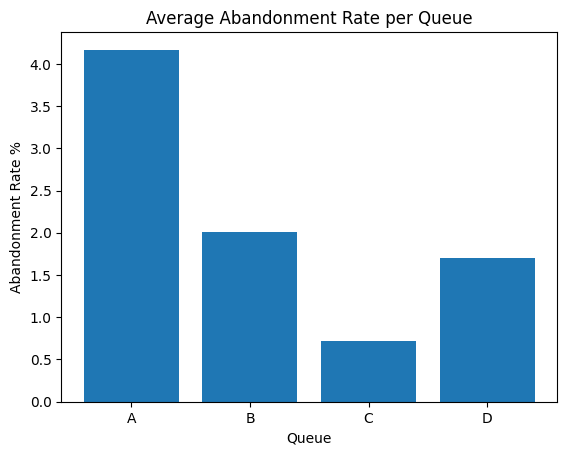

In [58]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
# ran the code as is and pandas returned an error about using the [i] and the need to use .iloc, so I looked that up and made the adjustments below:
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg({"Abandoned":"sum", "Calls":"sum"}).reset_index()
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"].iloc[i] / queue_dict["Calls"].iloc[i])*100
#multiplied by 100 so the numbers would be a percentage because they weren't making sense in the chart as decimals. 

#Your code below:
df_abandonment = pd.DataFrame(list(abandonment_rates.items()), columns=['Queue', 'Abandonment Rate'])

plt.bar(df_abandonment['Queue'], df_abandonment['Abandonment Rate'])

plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate %')




##### Record your answer below:

The average abandonment rate per queue is:
A - just over 4.0%
B - 2.0%
C - just over .5%
D - just over 1.5%

> Chart style you chose and why: Bar charts are a comparison option, and with only 4 queues, this is not a vizualisation that will get too complicated for someone else to read. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

Text(0, 0.5, 'Service Level %, average speed of answering incoming calls')

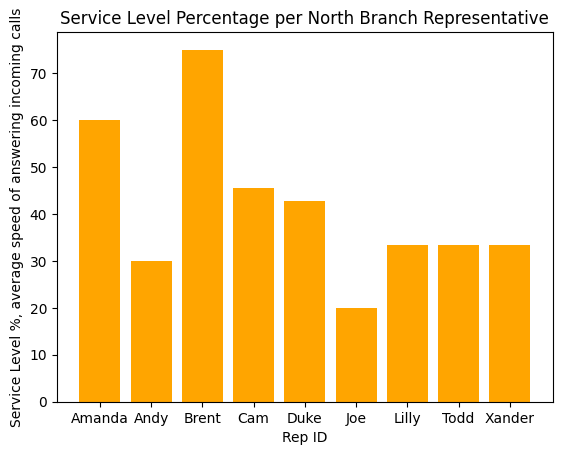

In [53]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_clean.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_clean[north_clean["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_clean[north_clean["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# north_plt & service_level are each dataframes that have the info for this viz
#Your Code Here:
# created a new dataframe in order to try to plot them both on one chart, but ended up not actually setting them up that way. Left the new df because it still worked for my purpose. 
df_stats_service = pd.merge(north_plt, service_level, on='Rep ID', how="inner")

plt.bar(df_stats_service['Rep ID'], df_stats_service['Service Level %'], label='%', color='orange')

plt.title('Service Level Percentage per North Branch Representative')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %, average speed of answering incoming calls')

# df_stats_service.head()  #My new dataframe showed the columns all in one new table as intended!


Text(0, 0.5, 'Incoming Wait Time (in seconds)')

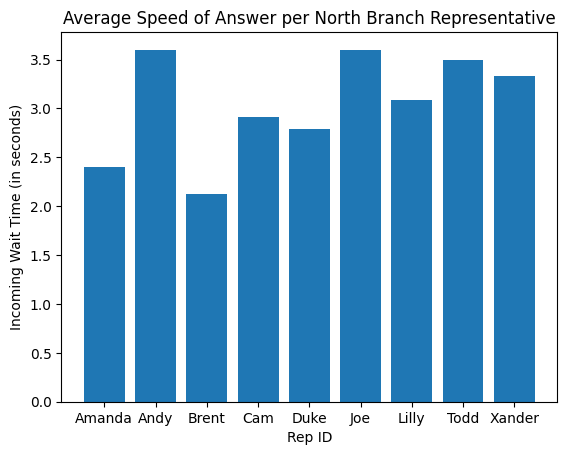

In [54]:
plt.bar(df_stats_service['Rep ID'], df_stats_service['Incoming Wait Time'], label='seconds')

plt.title('Average Speed of Answer per North Branch Representative')
plt.xlabel('Rep ID')
plt.ylabel('Incoming Wait Time (in seconds)')

##### Record your answer below:
> Amanda: speed = under 2.5, service = 60%
> Andy: speed = over 3.5,  service = 30%
> Brent: speed = over 2.0, service = 70%
> Cam: speed = under 3.0, service = 47%
> Duke: speed = over 2.5, service = 42%
> Joe: speed = over 3.5, service = 20%
> Lilly: speed = 3.0, service = 34%
> Todd: speed = 3.5, service = 34%
> Xander: speed = under 3.5, service = 34%  
> Chart style you chose and why:
> I split this into 2 charts because, even though the key as Rep ID is the same, I didn't like the way the scale of the percentage vs the seconds looked on one combined chart. I attempted combining a bar and a line in case that helped, but I don't think it made it much clearer.   

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose    Incoming or Outgoing
Complaint       Incoming                 51
ProductSupport  Outgoing                228
                Incoming                 82
SalesSupport    Outgoing                123
                Incoming                 75
Name: count, dtype: int64


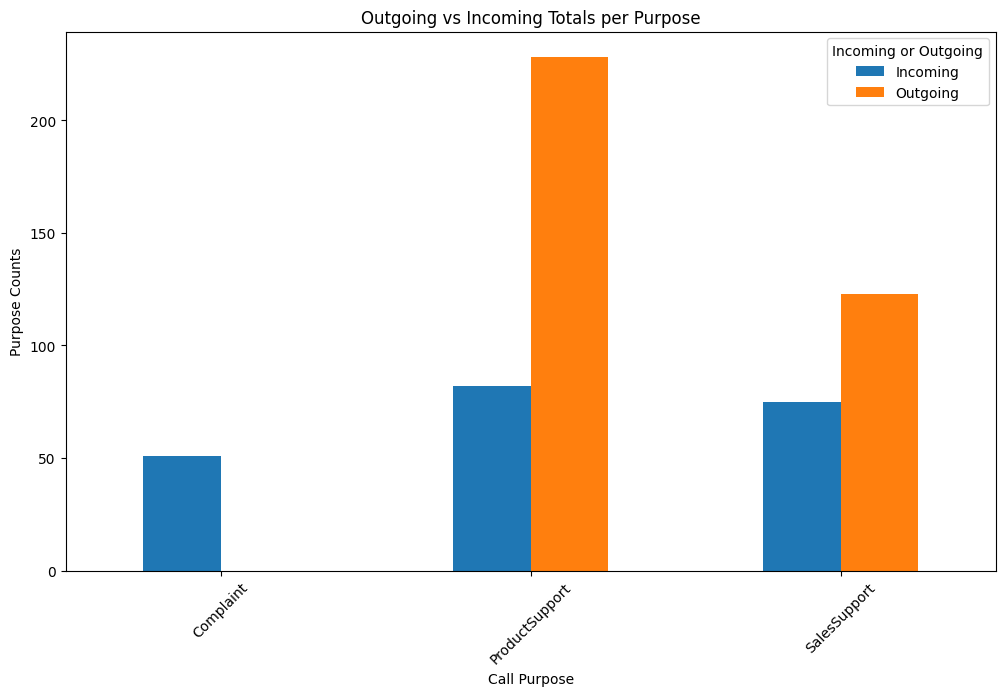

In [55]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "ProductSupport", "SalesSupport"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["SalesSupport"].to_dict()
product_support = purpose_counts["ProductSupport"].to_dict()

#Your Code Here:
# just creating a pivot table didn't work, so I had to regroup the dataframe and reset the index in order for the chart to identify the right values. 
purpose_counts = df.groupby(["Call Purpose", "Incoming or Outgoing"]).size().reset_index(name='Counts')

df_pivot = purpose_counts.pivot_table(index='Call Purpose', columns='Incoming or Outgoing', values='Counts', aggfunc='sum', fill_value=0)

# Plotting the multiple bar chart
df_pivot.plot(kind='bar', figsize=(12, 7))

# Add labels and title
plt.xlabel('Call Purpose')
plt.ylabel('Purpose Counts')
plt.title('Outgoing vs Incoming Totals per Purpose')

# Display the plot
plt.xticks(rotation=45)
plt.show()




##### Record your answer below:
>Call purpose and count of incoming or outgoing. 
>Complaint
>>Outgoing - 0
>>Incoming - 51
>ProductSupport
>>Outgoing - 228
>>Incoming - 82
>SalesSupport
>>Outgoing - 123
>>Incoming - 75
>

> Chart style you chose and why:
> The grouped bar chart showed a nice comparison between the incoming and outgoing numbers. Since the overall range between totals wassn't extreme, it makes it easy to interpret the amounts and really highlights the differences. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:
> North branch average abandoment rate is 2.86%
> South branch average abandonment rate is 1.27%
> 
> North branch service level is 40.24%
> South branch service level is 38.10%
> 
> North average speed of answer is 3.05 seconds
> South average speed of answer 3.0 seconds
>
> Based on the information above, the only category that the South Branch is behind in is service level, but it's just over 2% difference. The Branches are very close in all three KPIs, but the abandonment rate being significantly lower does indicate a high level of efficiency in the South Branch operations, even though under 2% is almost seen as "too efficient". South is operating more efficiently based on these numbers.  
> 
> 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:
> Reps in North branch, 9 with 245 calls logged during this sample
> Reps in South branch, 11 with 314 calls logged during this sample
>
> The North branch is operating less efficiently and has less reps, so it seems like the branch that would most benefit from additoinal help. The South Branch reps are taking more calls and beating the North branch in 2 out of the 3 KPIs that the call center company is focused on for efficieny at this time. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I would have liked to know the specific reason behind each of the lost calls. One option was that it was a technical errror, but the other possible reason given was the the call queue was at capacity. What does that mean exactly? If the North branch was at capacity and therefore the "lost call" number was higher, that would be valuable information to know versus an uncontrollable technical difficulty outside of the queue capacity. 
>Other than that data, it would just be interesting to dig in to more of the ways the different rep's stats worked out--looking at the reps during the time blocks would be something to consider. There was a higher overall volume of calls in the 12 o'clock hour--analyze who is taking those calls. Additonally, seeing if there is any correlation between the lenth of calls and call purpose might give useful information, particularly in this case of which branch needs more reps. And analyzing which reps are taking which types of calls. If someone is on more complaint calls, is that taking more time or less time than other calls? That's information that could be discovered by what's available within the collected data, so it would be fun to dig into that and see if the stakeholders have an interest in what can be discovered about the reps and the call purpose and how that ties into efficinecy overall. 
> 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [56]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: